In [226]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score, KFold
from sklearn import cross_validation
from sklearn.metrics import classification_report,accuracy_score 
from sklearn.metrics import roc_curve, auc, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import KernelPCA

sns.set_style("white")
pd.set_option("display.max_columns",50)

In [150]:
data = pd.read_csv('./data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [151]:
data['diagnosis'] = np.where(data['diagnosis']=='M',1,0)
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)
data.columns.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Total cases diagnosed with malignant tumor: 212
Total cases diagnosed with benign tumor: 357


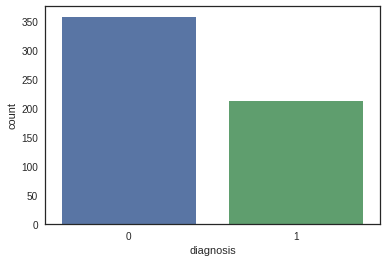

In [8]:
count_cases =  data.diagnosis.value_counts()
print "Total cases diagnosed with malignant tumor: %d" %(count_cases[1])
print "Total cases diagnosed with benign tumor: %d" %(count_cases[0])

sns.countplot(data['diagnosis'])

## Exploratory data analysis

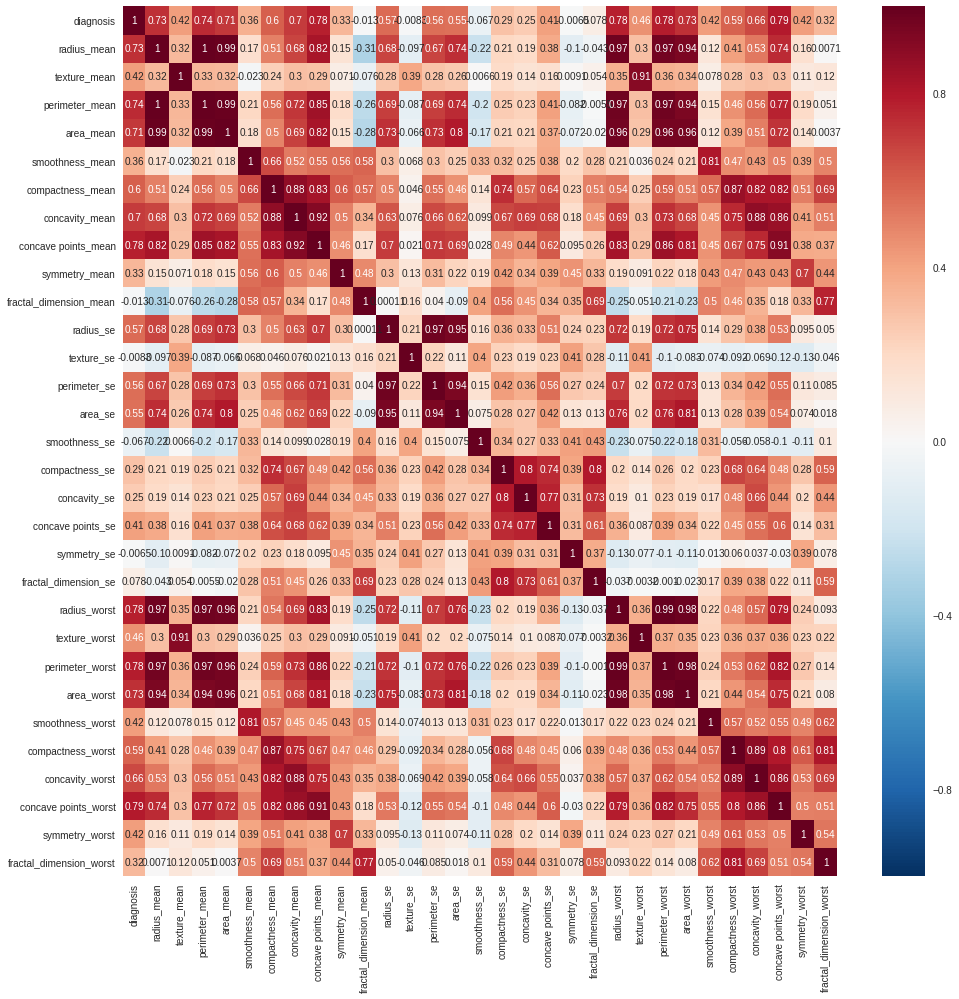

In [9]:
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(data.corr(), annot=True)

Observations from the correlation heatmap : 
1. As expected, the radius, perimeter and area are highly correlated.  
2. Compactness, concavity_mean and concave points are also highly correlated. 

Feature selection must be performed in order to remove redundancy.

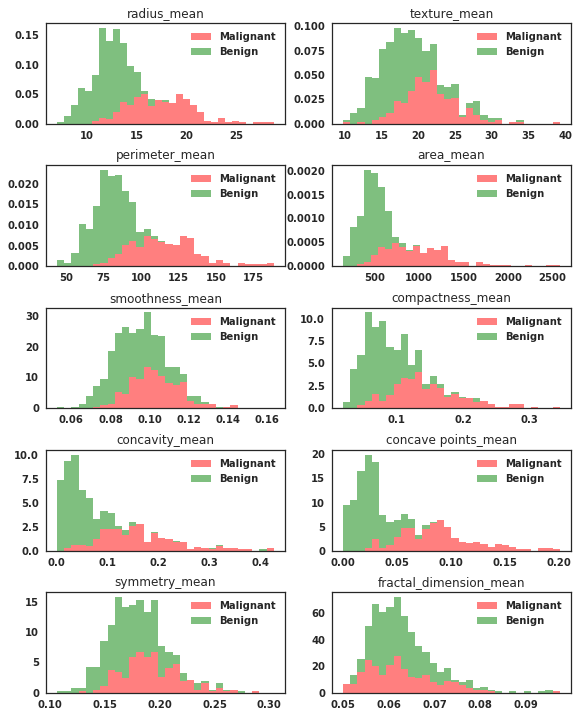

In [215]:
# Let us take a quick look at the distribution of the '_mean' suffix features across the benign and malignant groups. 

malignant = data[data['diagnosis'] ==1]
benign = data[data['diagnosis'] ==0]

features = list(data.columns[1:11])

plt.rcParams.update({'font.size': 8, 'font.weight':'bold', 'font.family':'italics'})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for x,y in enumerate(axes):
    y.figure
    binwidth= (max(data[features[x]]) - min(data[features[x]]))/30

    y.hist([malignant[features[x]],benign[features[x]]], 
           bins=np.arange(min(data[features[x]]), max(data[features[x]]) + binwidth, binwidth) , 
           alpha=0.5,stacked=True, normed = True, label=['Malignant','Benign'], color = ['red','green'])

    y.legend(loc='upper right')
    y.set_title(features[x])
    
plt.tight_layout()
plt.show()

Observations : 
1. For most of the features, distribution for the malignant cases is skewed towards the right.  
2. Mean valus of Concavity, concave_points, perimeter, radius and areas seem to be the most telling features.
3. Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
4. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

Note : Skewness is a measure of the symmetry in a distribution. 

Let us look at the skewness of all the features across the two classes to get a general idea.

In [214]:
skewness = pd.DataFrame()
skewness['benign'] = benign.skew()
skewness['malignant'] = malignant.skew()
skewness['difference'] = np.absolute(skewness['benign']-skewness['malignant'])
skewness =  skewness.sort_values(['difference'], ascending=False)
skewness.head(15)

,benign,malignant,difference
concavity_se,6.327025,1.623970,4.703055
area_se,1.646142,4.345029,2.698887
fractal_dimension_se,4.335433,1.672011,2.663422
concavity_mean,3.473264,0.901628,2.571636
smoothness_se,1.508496,3.958782,2.450286
concavity_worst,2.553715,0.912652,1.641062
perimeter_se,1.187740,2.810137,1.622398
symmetry_se,1.377815,2.519581,1.141766
radius_se,1.503924,2.519402,1.015478
area_worst,0.367454,1.307762,0.940308


In [14]:
data_diagnosis = data['diagnosis']

data_z = data.drop(['diagnosis'], axis=1)
data_z = (data_z - data_z.mean())/data_z.std()

data_z_mean = data_z.iloc[:,0:10]
data_z_mean = pd.concat([data_diagnosis, data_z_mean], axis=1)

data_z_se = data_z.iloc[:,10:20]
data_z_se = pd.concat([data_diagnosis, data_z_se], axis=1)

data_z_worst = data_z.iloc[:,20:30]
data_z_worst = pd.concat([data_diagnosis, data_z_worst], axis=1)

data_z_mean_melt = pd.melt(data_z_mean, id_vars="diagnosis", var_name="features", value_name='value')
data_z_se_melt = pd.melt(data_z_se, id_vars="diagnosis", var_name="features", value_name='value')
data_z_worst_melt = pd.melt(data_z_worst, id_vars="diagnosis", var_name="features", value_name='value')

In order to visualize all the features we'll use violin plots. The features are divided in three categories : Mean, SE and Average. Each categore has 10 feature types to observe. NOTE: The values of the features have been normalized for the plot.  

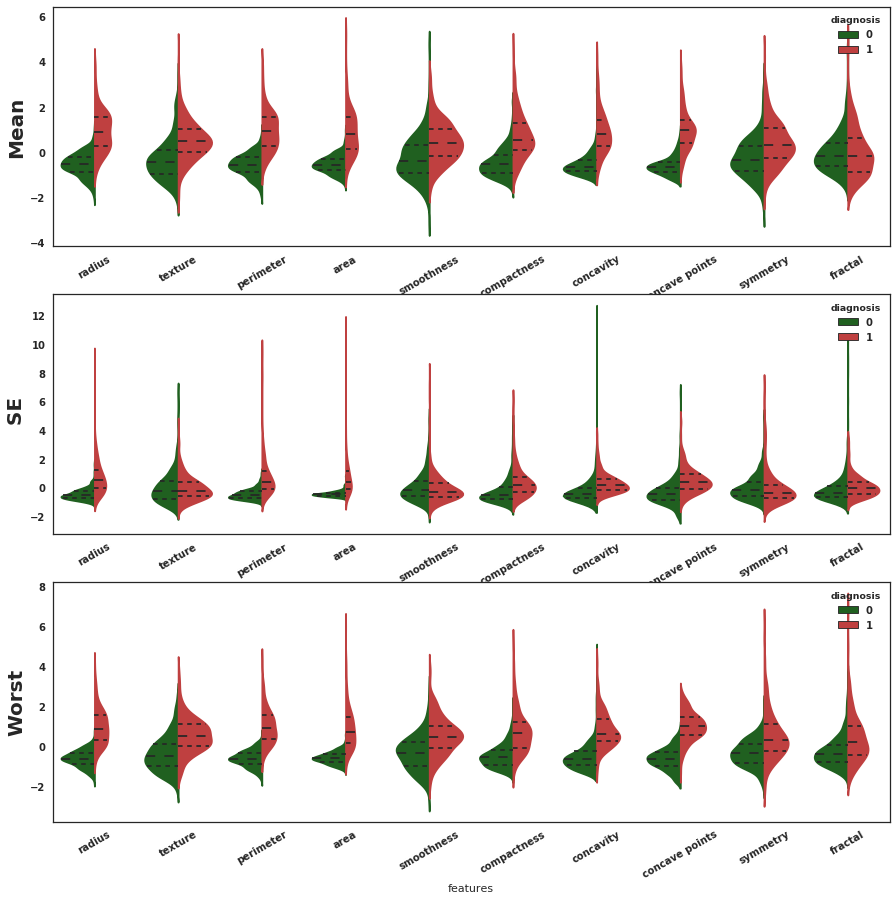

In [217]:
labels_x = data.columns.tolist()[1:11]
labels_x = [ i.split('_')[0] for i in labels_x]
labels_y = ['Mean', ' SE', 'Worst']

z_melt_list = [data_z_mean_melt, data_z_se_melt, data_z_worst_melt]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
axes = axes.ravel()
for x,y in enumerate(axes):
    y.figure
    g = sns.violinplot(x="features", y="value", hue="diagnosis", data=z_melt_list[x], split=True, inner="quart",
               palette={1: "red", 0: "green"}, saturation=0.5, ax=axes[x])
    y.set_ylabel(labels_y[x], {'fontsize': 20, 'fontweight':'bold'})
    y.set_xticklabels(labels_x, rotation=30)

In [17]:
#Check for missing data or invalid values.
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Model Selection 

In [161]:
X = data.iloc[:, 1:] # extract all the feautres other than the diagnosis 
y = data.diagnosis   # target variable, the one we are trying to predict from X

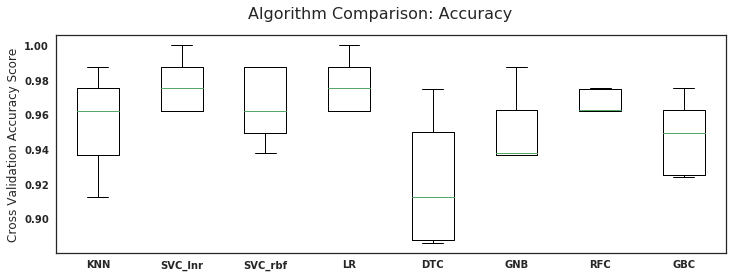

In [162]:
## MODEL SELECTION
## Evaluating the performance of various models using default parameters. 
## Contenders for the best classifier : K-Nearest Neighbors, Support Vector Classifier, 
## Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost 

# Evaluation method 1 : Train/Test Split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 5)

# Scaling features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC_lnr', SVC(kernel='linear')))
models.append(('SVC_rbf', SVC(kernel='rbf')))
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

names = []
scores = []
accuracy = []
f1 = []

for name, model in models:

    kfold = KFold(n_splits=5, random_state=5)
    accuracy_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    f1_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    accuracy.append(accuracy_results)
    f1.append(f1_results)
    #print ("%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std()))
    names.append(name)

fig = plt.figure( figsize=(12, 4))
fig.suptitle('Algorithm Comparison: Accuracy', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(accuracy)
ax.set_xticklabels(names)
ax.set_ylabel('Cross Validation Accuracy Score', fontsize = 12 )
plt.show()

Based on this boxplot we select Support Vector Classifiers, Random forests and Logistic regression for further analysis as their performance is consistently good across all cross validations. The next step would be feature reduction as we know that quite a few features are highly correlated and we must get rid of redundancy. 

## Feature Reduction

We will use 4 different automatic feature selection techniques:

1)Univariate Selection.

2)Recursive Feature Elimination.

3)Principle Component Analysis.

4)Feature Importance.

## Feature reduction using Univaraite Selection.

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. 

Here we use the chi squared (chi^2) statistical test for non-negative features to select 12 of the best features in our dataset.

Accuracy of SVC model using Univariate selection : 0.959064


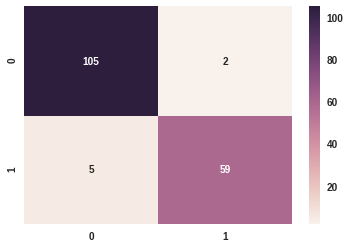

In [306]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
sel = SelectKBest(score_func=chi2, k=12)
sel = sel.fit(X_train, y_train)

train_sel = sel.transform(X_train)
test_sel = sel.transform(X_test)

# Apply  SVC 
clf_svc_sel = SVC(kernel='linear').fit(train_sel, y_train)
score_svc_sel = clf_svc_sel.score(test_sel, y_test)

print "Accuracy of SVC model using Univariate selection : %f" %(score_svc_sel)

cm = confusion_matrix(y_test,clf_svc_sel.predict(test_sel))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

## Feature reduction using Recursive Feature Elimination with cross validation

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [163]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

feature_names = (data.columns[1:].values)

def RFEcv(estimator, X,y,feature_names):
    X = X.values
    y = y.values
    rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5),scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)
    print ("Accuracy obtained with optimal features : %f" %(rfecv.grid_scores_[rfecv.n_features_-1]))
    print("Best features :", feature_names[rfecv.support_])
    
    # Plot number of features VS. cross-validation scores
    plt.figure(figsize=(12, 6))
    plt.xlabel("Number of features selected", fontsize = 15)
    plt.ylabel("Cross validation score",fontsize = 15)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()  

Optimal number of features : 23
Accuracy obtained with optimal features : 0.969905
('Best features :', array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype=object))


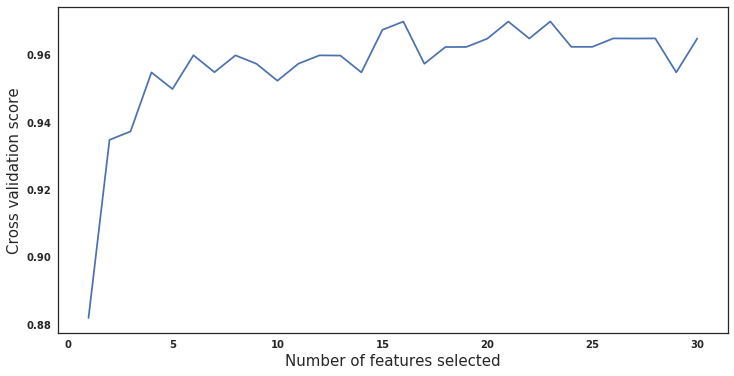

In [169]:
# split data train 70 % and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 5)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=5) 
RFEcv(clf_rf, X_train, y_train, feature_names)

Optimal number of features : 13
Accuracy obtained with optimal features : 0.959810
('Best features :', array(['radius_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'texture_se',
       'radius_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object))


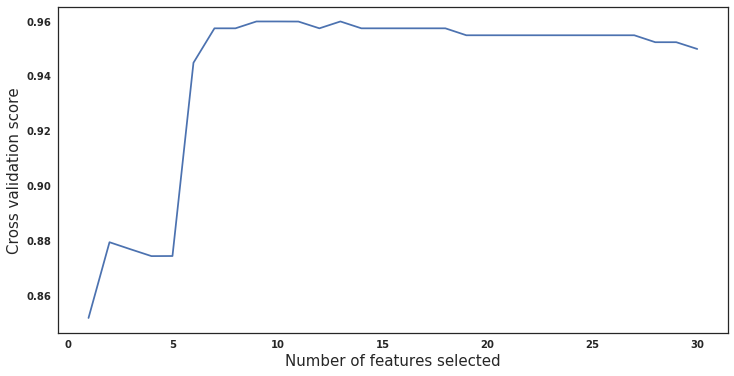

In [170]:
clf_svc = SVC(kernel='linear') 
RFEcv(clf_svc, X_train, y_train, feature_names)

Optimal number of features : 30
Accuracy obtained with optimal features : 0.952278
('Best features :', array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype=object))


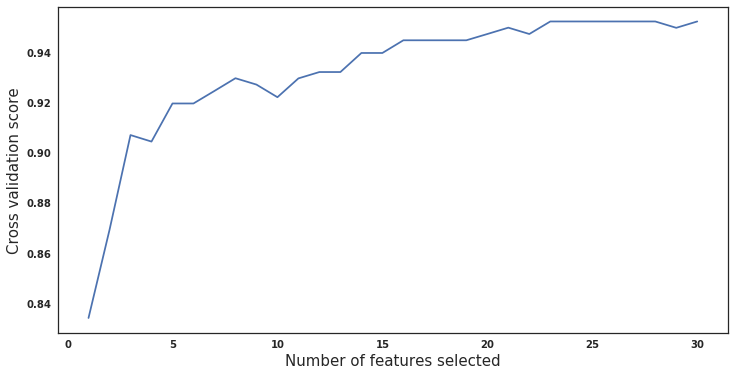

In [171]:
clf_lr = LogisticRegression()
RFEcv(clf_lr, X_train, y_train, feature_names)

Validating all three models on Test data set

Accurace of SVC model on Test set using 13 features : 0.959064


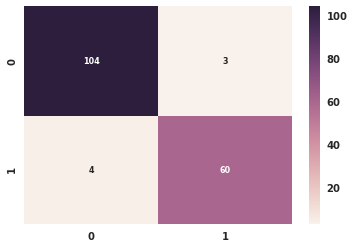

In [222]:
# Support Vector Machine
features_svc = ['radius_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'texture_se',
       'radius_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']

X_train_svc = X_train[features_svc]
clf_svc = SVC(kernel='linear').fit(X_train_svc, y_train)

X_test_svc = X_test[features_svc]
score_svc = clf_svc.score(X_test_svc, y_test)

print "Accurace of SVC model on Test set using 13 features : %f" %(score_svc)

cm = confusion_matrix(y_test,clf_svc.predict(X_test_svc))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Accurace of RFC model on Test set using 23 features : 0.947368


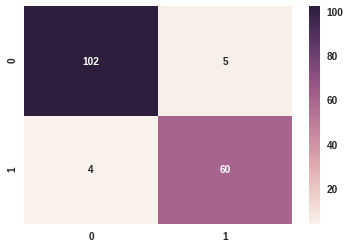

In [289]:
# Random firest Classifier
features_rfc = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'perimeter_se', 'area_se', 'compactness_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


X_train_rfc = X_train[features_rfc]
clf_rfc = RandomForestClassifier(n_estimators=500).fit(X_train_rfc, y_train)

X_test_rfc = X_test[features_rfc]
score_rfc = clf_rfc.score(X_test_rfc, y_test)

print "Accurace of RFC model on Test set using 23 features : %f" %(score_rfc)

cm = confusion_matrix(y_test,clf_rfc.predict(X_test_rfc))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Clearly the SVC model with 13 features is performing better than the RFC model with 23 features. We may be able to improve the accuracy of SVC model by tuning the hyper parameters. We'll use Gridsearch for model tuning.

## Model tuning

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

def grid_search(X,y, nfolds):
    C_range = 10. ** np.arange(0, 10)
    gamma_range = 10. ** np.arange(-6, 4)
    kernels= ['linear', 'rbf']
    param_grid = dict(gamma=gamma_range, C=C_range)
    grid = GridSearchCV(SVC(), param_grid=param_grid, cv=StratifiedKFold(y=y,n_folds=nfolds))
    grid.fit(X, y)

    # plot the scores of the grid
    # grid_scores_ contains parameter settings and scores

    score_dict_mod = grid.cv_results_
    scores = score_dict_mod['mean_test_score'] 
    scores = np.array(scores).reshape(len(C_range), len(gamma_range))

    # Make a nice figure
    plt.figure(figsize=(12, 8))
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.spectral)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.colorbar()
    plt.show()
    return(grid.best_estimator_)

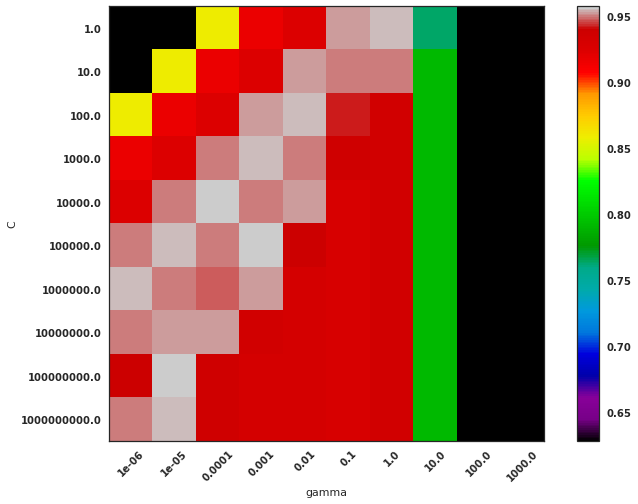

SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
grid_search(X_train_svc, y_train, 3)

Accuracy of tuned SVC model on Test set using 13 features : 0.964912


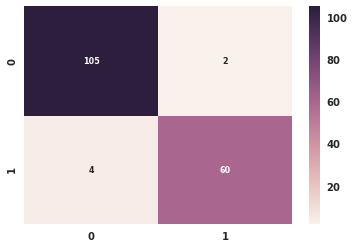

In [225]:
clf_svc_tuned = SVC(kernel='rbf', C=10000, gamma=0.001).fit(X_train_svc, y_train)
score_svc_tuned = clf_svc_tuned.score(X_test_svc, y_test)

print "Accuracy of tuned SVC model on Test set using 13 features : %f" %(score_svc_tuned)

cm = confusion_matrix(y_test,clf_svc_tuned.predict(X_test_svc))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Tuning the SVC model slightly improves the accuracy of the model. An accuracy of 96.49% is achieved on the test set.

## Feature reduction using PCA
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.



[  44.05   62.84   72.9    79.54   85.03   88.8    91.11   92.69   94.13
   95.21   96.25   97.09   97.86   98.38   98.7    98.95   99.15   99.33
   99.5    99.61   99.7    99.78   99.86   99.91   99.96   99.99  100.01
  100.01  100.01  100.01]


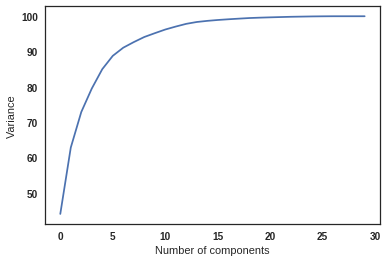

In [307]:
from sklearn.decomposition import PCA

def pca(X, n_dimensions):
    pca = PCA(n_dimensions)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(X)
    return (projected)

X_pca = X
y_pca = y

# Standardize features
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#fitting PCA on the training set only
pca = PCA(n_components=30)
pca.fit(X_train_scaled)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print var1

plt.plot(var1)
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

Accuracy of SVC model using PCA : 0.976608


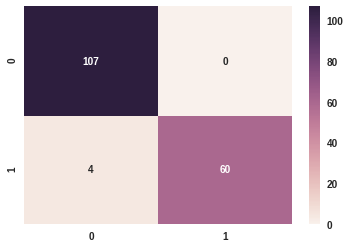

In [255]:
# Looking at above plot I'm taking 10 variables
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

# Apply the mapping (transform) to both the training set and the test set.
train_pca = pca.transform(X_train_scaled)
test_pca = pca.transform(X_test_scaled)

# Apply  SVC to the Transformed Data
clf_svc_pca = SVC(kernel='linear').fit(train_pca, y_train)
score_svc_pca = clf_svc_pca.score(test_pca, y_test)

print "Accuracy of SVC model using PCA : %f" %(score_svc_pca)

cm = confusion_matrix(y_test,clf_svc_pca.predict(test_pca))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Using 10 principle components we can achieve an accuracy of 97.66% on the test set.

## Feature reduction using Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [279]:
clf_rfc_fi = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
feature_importance = pd.DataFrame (clf_rfc_fi.feature_importances_ , index = X_train.columns, columns=['importance'])
feature_importance.sort_values(['importance'], ascending=True, inplace=True)
feature_importance['Relative importance'] = feature_importance['importance'].apply(lambda x: 100 * x/feature_importance['importance'].max())

In [281]:
feature_importance

,importance,Relative importance
texture_se,0.002903,1.960336
symmetry_mean,0.002958,1.997566
fractal_dimension_se,0.003079,2.079592
symmetry_se,0.003217,2.172623
smoothness_se,0.003419,2.308704
compactness_se,0.003670,2.478249
concave points_se,0.004114,2.777992
concavity_se,0.004173,2.818060
smoothness_mean,0.004571,3.086745
fractal_dimension_mean,0.004742,3.202175


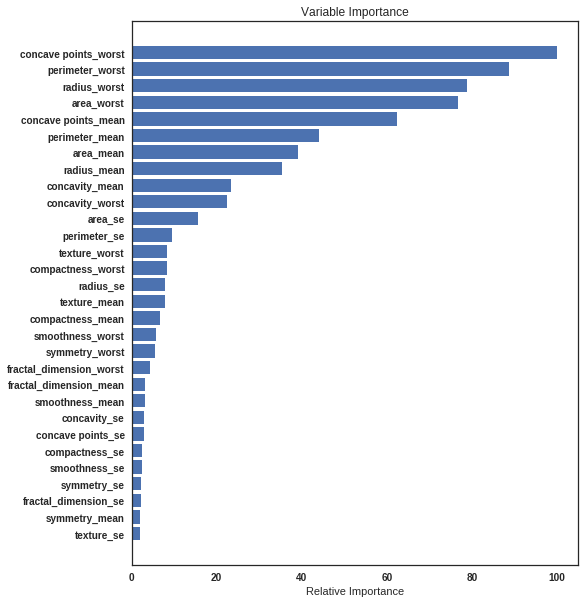

In [283]:
y_pos = np.arange(feature_importance.shape[0])
fig, ax = plt.subplots(figsize=(8,10))
plt.barh(y_pos, feature_importance['Relative importance'].values, align='center')
plt.yticks(y_pos, feature_importance.index.tolist())
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.savefig('./figures/feature_importance_forest.tiff', dpi = 300)
plt.draw()
plt.show()

Accurace of RFC model on Test set using 12 features : 0.923977


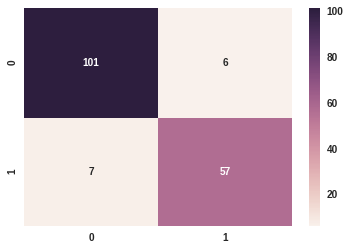

In [290]:
features_fi = feature_importance.index.tolist()[-12:]

train_fi = X_train[features_fi]
test_fi = X_test[features_fi]

clf_rfc_fi_12 = RandomForestClassifier(n_estimators=500).fit(train_fi, y_train)
score_rfc_fi = clf_rfc_fi_12.score(test_fi, y_test)

print "Accurace of RFC model on Test set using 12 features : %f" %(score_rfc_fi)

cm = confusion_matrix(y_test,clf_rfc_fi_12.predict(test_fi))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

The accuracy of the model on test set is 92.3%. One reason for the comparatively lower accuracy may be the fact that the selected top 12 features are correlated (eg perimeter_worst, radius_worst, area_worst), so the information contained in them is redundant. 

For this dataset, the best results (accuracy on test set = 97.66%) were obtained using PCA for feature reduction.